Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE  Train MSE  Train MAE   Test R2  Test RMSE  \
0      6  0.787230    0.087079   0.007583   0.064076  0.780781   0.088468   
1      8  0.873133    0.067241   0.004521   0.048189  0.866960   0.068918   
2     10  0.929946    0.049966   0.002497   0.034378  0.921299   0.053007   
3     12  0.962857    0.036383   0.001324   0.022902  0.953853   0.040590   

   Test MSE  Test MAE  
0  0.007827  0.065153  
1  0.004750  0.049324  
2  0.002810  0.036263  
3  0.001648  0.025056  


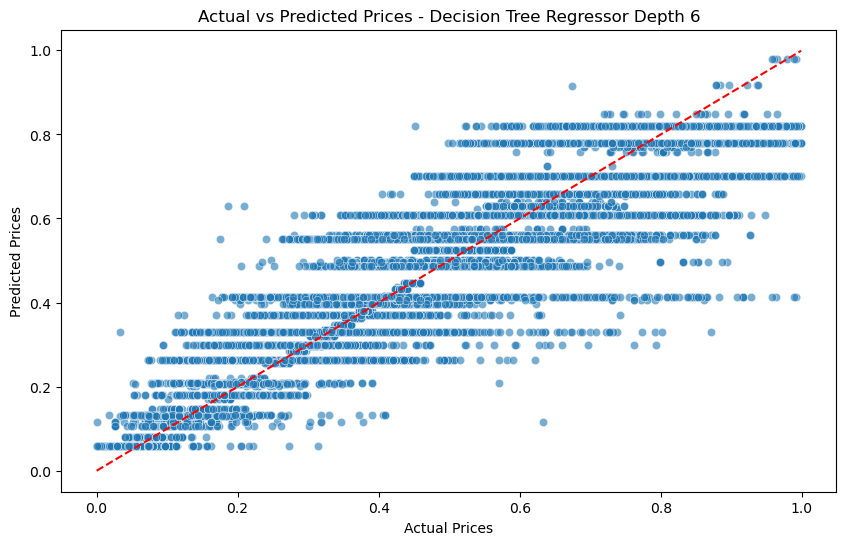

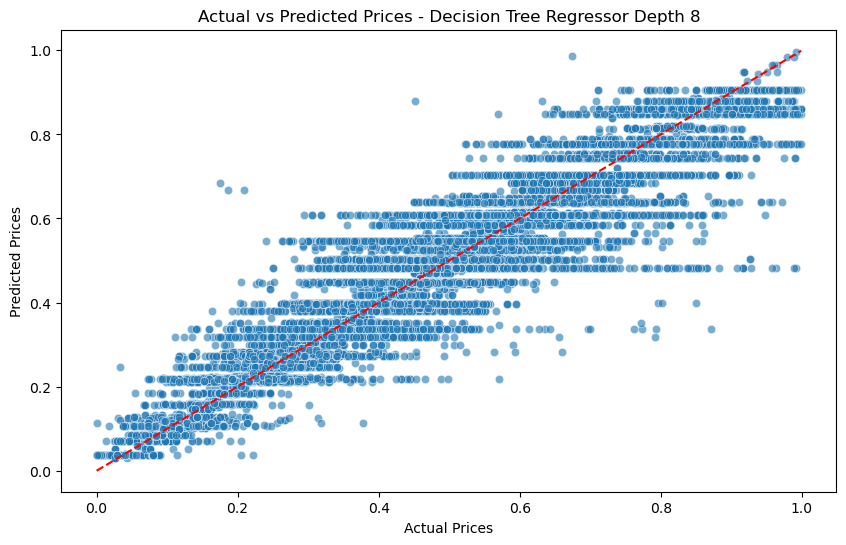

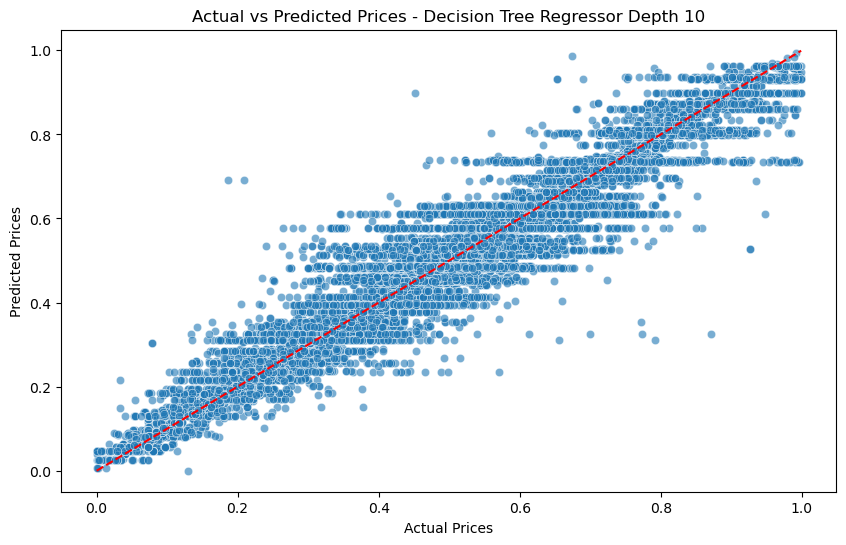

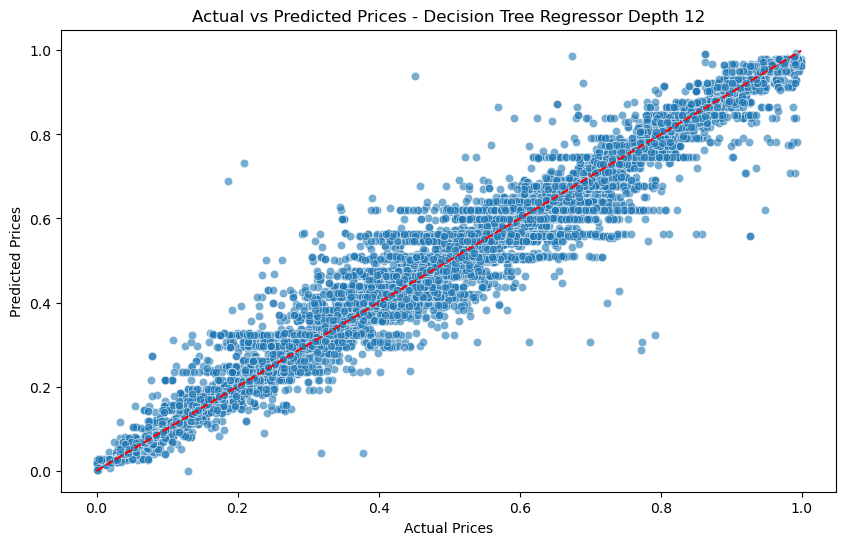

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('05_07_hotels_data_normalized.csv')
df2 = pd.read_csv('25_06_hotels_data_normalized.csv')
df3 = pd.read_csv('20_6_hotels_data_normalized.csv')
# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()


Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE  Train MSE  Train MAE   Test R2  Test RMSE  \
0      6  0.686567    0.102854   0.010579   0.073949  0.686949   0.103506   
1      8  0.779167    0.086334   0.007453   0.058754  0.773601   0.088023   
2     10  0.858873    0.069016   0.004763   0.044676  0.850402   0.071552   
3     12  0.922211    0.051240   0.002626   0.030802  0.910407   0.055373   
4     13  0.943300    0.043746   0.001914   0.025078  0.933778   0.047606   
5     14  0.962793    0.035438   0.001256   0.019148  0.953368   0.039949   

   Test MSE  Test MAE  
0  0.010714  0.074563  
1  0.007748  0.059942  
2  0.005120  0.046285  
3  0.003066  0.033337  
4  0.002266  0.027643  
5  0.001596  0.021840  


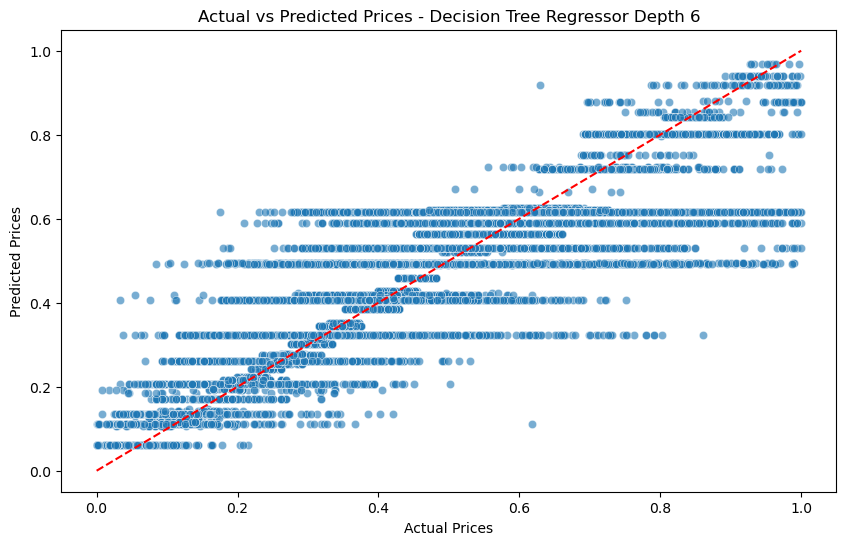

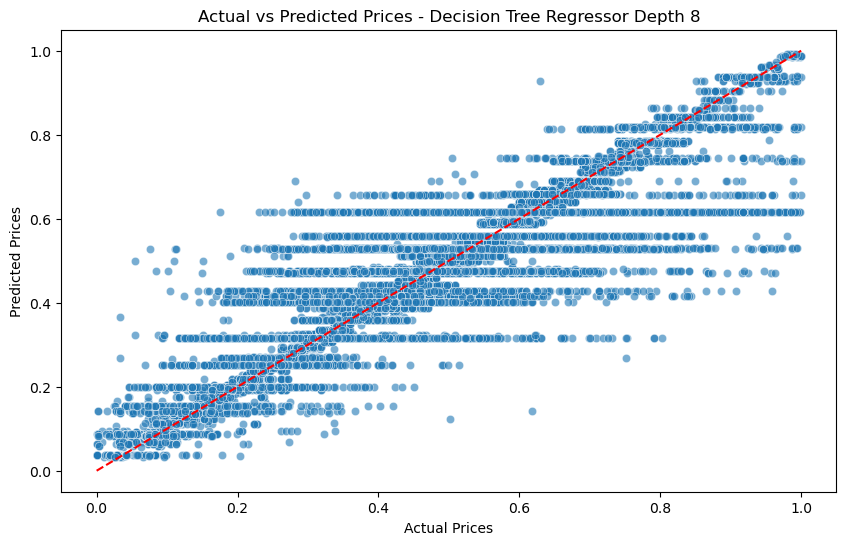

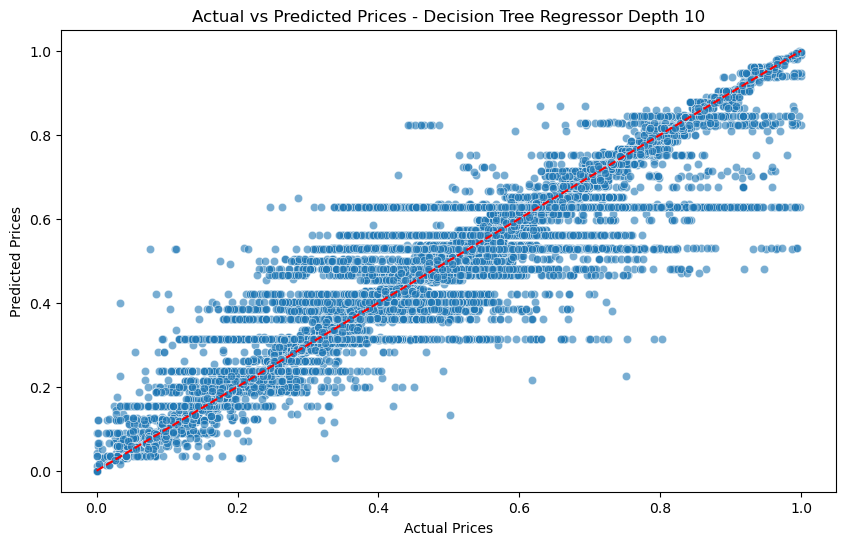

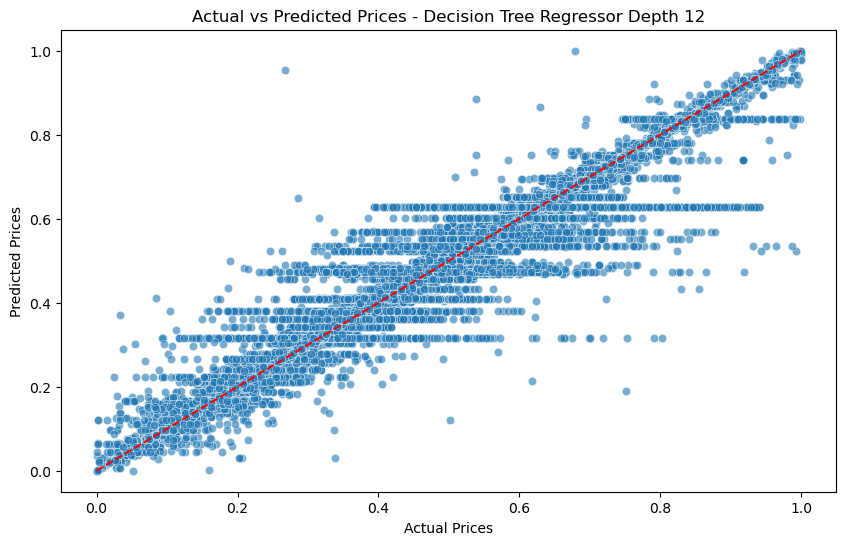

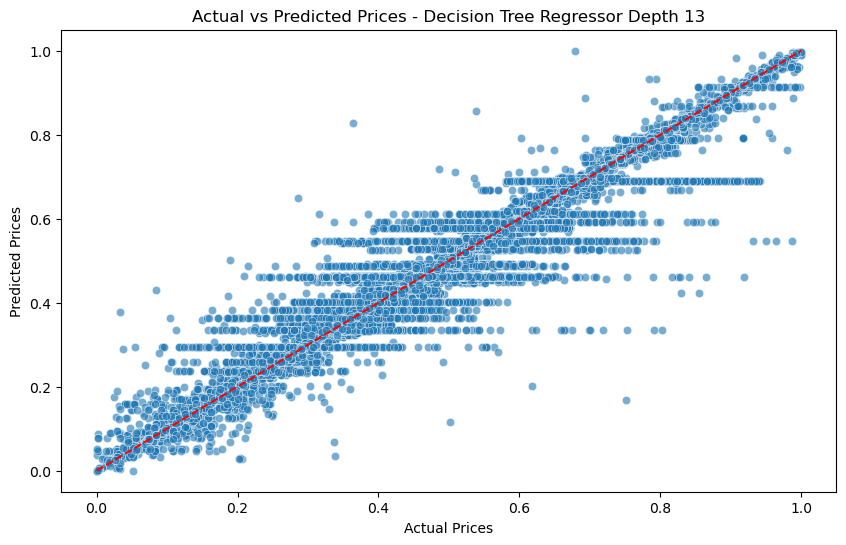

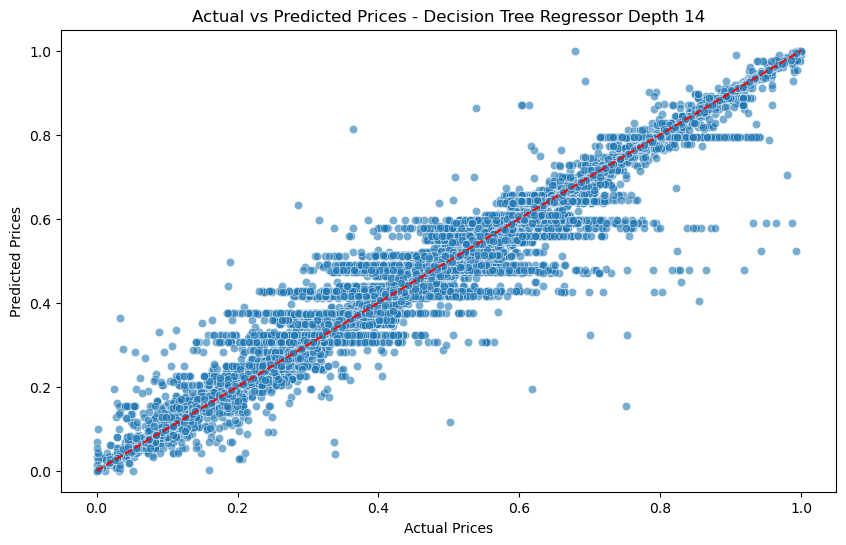

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('05_07_clean_normalized.csv')
df2 = pd.read_csv('25_6_clean_normalized.csv')
df3 = pd.read_csv('20_6_clean_normalized.csv')
# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12,13,14]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the preprocessed data splits
with open('train_test_splits.pkl', 'rb') as f:
    X_train_splits, X_test_splits, y_train_splits, y_test_splits = pickle.load(f)

# Initialize models with different depths
depths = [6, 8, 10, 12,13,14]
results = []
predictions = {}

for depth in depths:
    for star_rating, X_train in X_train_splits.items():
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(X_train, y_train_splits[star_rating])
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test_splits[star_rating])
        
        # Training metrics
        train_r2 = r2_score(y_train_splits[star_rating], y_train_pred)
        train_rmse = mean_squared_error(y_train_splits[star_rating], y_train_pred, squared=False)
        train_mse = mean_squared_error(y_train_splits[star_rating], y_train_pred)
        train_mae = mean_absolute_error(y_train_splits[star_rating], y_train_pred)
        
        # Test metrics
        test_r2 = r2_score(y_test_splits[star_rating], y_test_pred)
        test_rmse = mean_squared_error(y_test_splits[star_rating], y_test_pred, squared=False)
        test_mse = mean_squared_error(y_test_splits[star_rating], y_test_pred)
        test_mae = mean_absolute_error(y_test_splits[star_rating], y_test_pred)
        
        results.append({
            'Depth': depth,
            'Star Rating': star_rating,
            'Train R2': train_r2,
            'Train RMSE': train_rmse,
            'Train MSE': train_mse,
            'Train MAE': train_mae,
            'Test R2': test_r2,
            'Test RMSE': test_rmse,
            'Test MSE': test_mse,
            'Test MAE': test_mae
        })
        
        # Store predictions for plotting
        predictions[f'Depth {depth} - Star Rating {star_rating}'] = (y_test_splits[star_rating], y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results with Star Rating as First Node:")
print(results_df)

# Plot actual vs predicted prices for each depth and star rating
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()